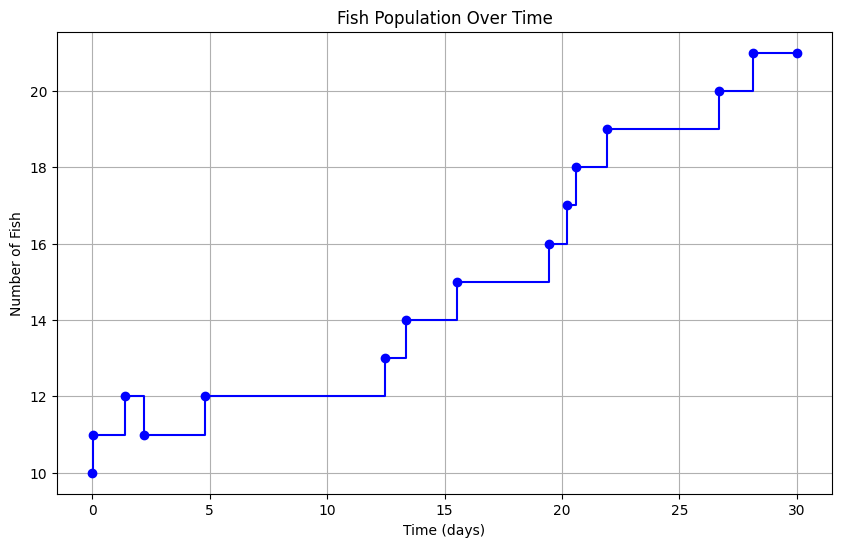

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 0.02  # Birth rate per day
q = 0.005 # Death rate per day
initial_population = 10
max_time = 30

# Gillespie Algorithm for population dynamics
def simulate_population(p, q, initial_population, max_time):
    t = 0
    N = initial_population
    times = [t]
    population = [N]
    
    while t < max_time and N > 0:
        B = p * N  # Birth rate
        D = q * N  # Death rate
        total_rate = B + D
        
        if total_rate <= 0:
            total_rate = 0
        else:
            # Time until next event
            R1 = np.random.uniform(0, 1)
            delta_t = -np.log(R1) / total_rate
            t += delta_t
            
            if t > max_time:
                t = max_time
            else:
                # Determine the event: birth or death
                R2 = np.random.uniform(0, 1)
                if R2 < B / total_rate:
                    N += 1  # Birth occurs
                else:
                    N -= 1  # Death occurs
        
        times.append(t)
        population.append(N)
    
    return times, population

# Simulate the population
times, population = simulate_population(p, q, initial_population, max_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.step(times, population, where='post', marker='o', linestyle='-', color='b')
plt.title('Fish Population Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Number of Fish')
plt.grid(True)
plt.show()

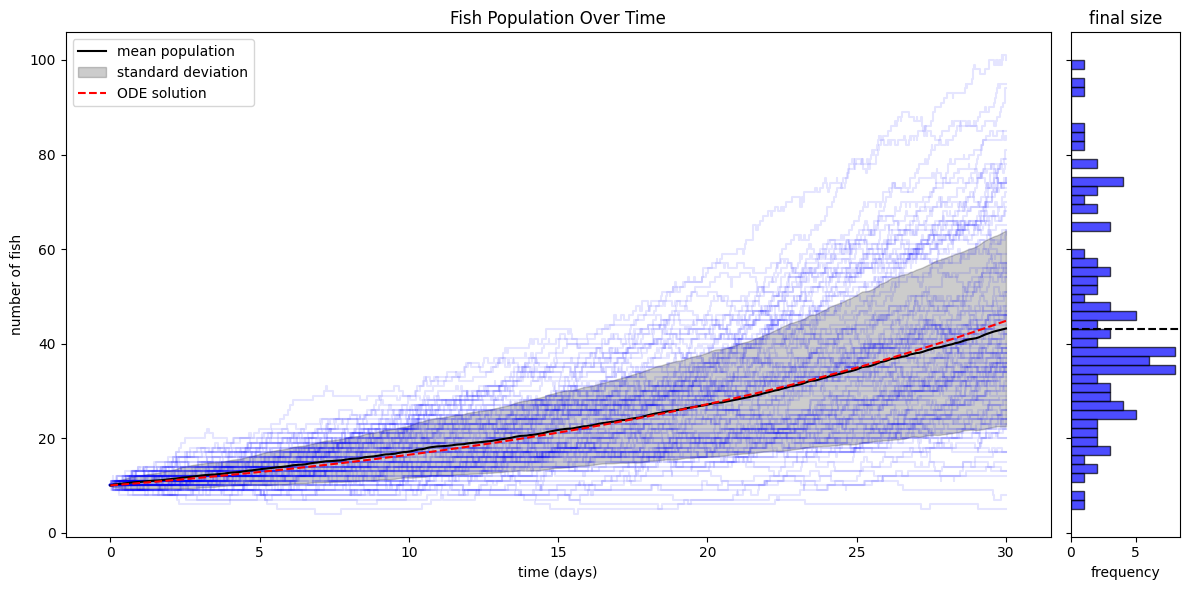

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.integrate import solve_ivp

# Define the ODE
def ode_model(t, N, p, q):
    return (p* N - q * N)

# Parameters
p = 0.1  # Birth rate per day
q = 0.05 # Death rate per day
initial_population = 10
max_time = 30
num_simulations = 100
sub_sample = 100
time_points = np.linspace(0, max_time, 300)

# Use solve_ivp to solve the ODE
ode_solution = solve_ivp(ode_model, [0, max_time], [initial_population], args=(p, q), t_eval=time_points)

# Extract the ODE solution
ode_solution_values = ode_solution.y[0]

# Store population at each time step
populations = np.zeros((num_simulations, len(time_points)))
all_simulations = []

# Run the simulations and store the results
for i in range(num_simulations):
    times, population = simulate_population(p, q, initial_population, max_time)
    all_simulations.append((times, population))  # Store the time and population for each simulation
    populations[i, :] = np.interp(time_points, times, population)
    
# Compute final population only after all simulations are complete
final_population = [pop[-1] for _, pop in all_simulations]

# Compute mean and standard deviation
mean_population = np.mean(populations, axis=0)
std_population = np.std(populations, axis=0)

# Set up the figure and GridSpec
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[9, 1])  # More space for time series, less for histogram

# Plot the time series
ax1 = fig.add_subplot(gs[0])

# Select 100 simulations to plot from the precomputed simulations
selected_simulations = np.random.choice(range(num_simulations), sub_sample, replace=False)
for i in selected_simulations:
    times, population = all_simulations[i]
    ax1.step(times, population, where='post', linestyle='-', color='b', alpha=0.1)

# Plot mean and standard deviation
ax1.plot(time_points, mean_population, color='black', label='mean population')
ax1.fill_between(time_points, mean_population - std_population, mean_population + std_population, color='black', alpha=0.2, label='standard deviation')
ax1.plot(time_points, ode_solution_values, color='red', linestyle='--', label='ODE solution')
ax1.set_title('Fish Population Over Time')
ax1.set_xlabel('time (days)')
ax1.set_ylabel('number of fish')
ax1.legend()

# Plot the histogram aligned with the time series
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax2.hist(final_population, bins=50, color='b', edgecolor='black', alpha=0.7, orientation='horizontal')
ax2.axhline(y=mean_population[-1], color='black', linestyle='--', label='End Point')
ax2.set_xlabel('frequency')
ax2.set_title('final size')

# Hide y-ticks for the histogram to avoid clutter
plt.setp(ax2.get_yticklabels(), visible=False)

# Adjust layout
plt.tight_layout()
plt.show()
